In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

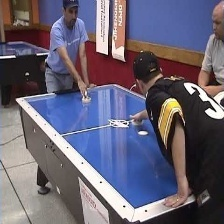

In [6]:
display(Image("Image Dataset/test/air hockey/1.jpg"))

In [7]:
from IPython.display import Image

In [8]:
def process_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [224, 224])  # Resize the image to the desired size
    return image

In [9]:
df = pd.read_csv("sports.csv")

In [10]:
df.head()

,class id,filepaths,labels,data set
0,0,train/air hockey/001.jpg,air hockey,train
1,0,train/air hockey/002.jpg,air hockey,train
2,0,train/air hockey/003.jpg,air hockey,train
3,0,train/air hockey/004.jpg,air hockey,train
4,0,train/air hockey/005.jpg,air hockey,train


In [11]:
filepaths = ["Image Dataset/" + filepath for filepath in df["filepaths"]]

In [12]:
filepaths

['Image Dataset/train/air hockey/001.jpg',
 'Image Dataset/train/air hockey/002.jpg',
 'Image Dataset/train/air hockey/003.jpg',
 'Image Dataset/train/air hockey/004.jpg',
 'Image Dataset/train/air hockey/005.jpg',
 'Image Dataset/train/air hockey/006.jpg',
 'Image Dataset/train/air hockey/007.jpg',
 'Image Dataset/train/air hockey/008.jpg',
 'Image Dataset/train/air hockey/009.jpg',
 'Image Dataset/train/air hockey/010.jpg',
 'Image Dataset/train/air hockey/011.jpg',
 'Image Dataset/train/air hockey/012.jpg',
 'Image Dataset/train/air hockey/013.jpg',
 'Image Dataset/train/air hockey/014.jpg',
 'Image Dataset/train/air hockey/015.jpg',
 'Image Dataset/train/air hockey/016.jpg',
 'Image Dataset/train/air hockey/017.jpg',
 'Image Dataset/train/air hockey/018.jpg',
 'Image Dataset/train/air hockey/019.jpg',
 'Image Dataset/train/air hockey/020.jpg',
 'Image Dataset/train/air hockey/021.jpg',
 'Image Dataset/train/air hockey/022.jpg',
 'Image Dataset/train/air hockey/023.jpg',
 'Image Dat

In [13]:
x = filepaths

In [14]:
df

,class id,filepaths,labels,data set
0,0,train/air hockey/001.jpg,air hockey,train
1,0,train/air hockey/002.jpg,air hockey,train
2,0,train/air hockey/003.jpg,air hockey,train
3,0,train/air hockey/004.jpg,air hockey,train
4,0,train/air hockey/005.jpg,air hockey,train
...,...,...,...,...
14488,99,valid/wingsuit flying/1.jpg,wingsuit flying,valid
14489,99,valid/wingsuit flying/2.jpg,wingsuit flying,valid
14490,99,valid/wingsuit flying/3.jpg,wingsuit flying,valid
14491,99,valid/wingsuit flying/4.jpg,wingsuit flying,valid


In [15]:
unique_labels = df["labels"].unique()

In [16]:
y = [label == unique_labels for label in df["labels"]]

In [17]:
y

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, Fal

In [18]:
len(y)

14493

In [19]:
len(x)

14493

In [20]:
def process_image(filepath):
    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [224, 224])
    return img

In [21]:
def get_image_label(filepath, label):
    img = process_image(filepath)
    return img, label

In [22]:
x

['Image Dataset/train/air hockey/001.jpg',
 'Image Dataset/train/air hockey/002.jpg',
 'Image Dataset/train/air hockey/003.jpg',
 'Image Dataset/train/air hockey/004.jpg',
 'Image Dataset/train/air hockey/005.jpg',
 'Image Dataset/train/air hockey/006.jpg',
 'Image Dataset/train/air hockey/007.jpg',
 'Image Dataset/train/air hockey/008.jpg',
 'Image Dataset/train/air hockey/009.jpg',
 'Image Dataset/train/air hockey/010.jpg',
 'Image Dataset/train/air hockey/011.jpg',
 'Image Dataset/train/air hockey/012.jpg',
 'Image Dataset/train/air hockey/013.jpg',
 'Image Dataset/train/air hockey/014.jpg',
 'Image Dataset/train/air hockey/015.jpg',
 'Image Dataset/train/air hockey/016.jpg',
 'Image Dataset/train/air hockey/017.jpg',
 'Image Dataset/train/air hockey/018.jpg',
 'Image Dataset/train/air hockey/019.jpg',
 'Image Dataset/train/air hockey/020.jpg',
 'Image Dataset/train/air hockey/021.jpg',
 'Image Dataset/train/air hockey/022.jpg',
 'Image Dataset/train/air hockey/023.jpg',
 'Image Dat

In [23]:
def create_batches(x, y=None, test_data=False, val_data=False):
    if test_data:
        data = tf.data.Dataset.from_tensor_slices(tf.constant(x))
        data = data.map(process_image).batch(32)
        return data
    elif val_data:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
        data = data.map(get_image_label).batch(32)
        return data
    else:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
        data = (
            data.map(get_image_label).shuffle(buffer_size=len(x)).batch(32)
        )  # Shuffle here
        return data

In [24]:
test_data = create_batches(x, test_data=True)

In [25]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [26]:
train_data = create_batches(x, y)

In [32]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100), dtype=tf.bool, name=None))>

In [33]:
input_shape = [None, 224, 224, 3]
output_shape = len(unique_labels)

In [34]:
model_url = (
    "https://www.kaggle.com/models/tensorflow/resnet-50/TensorFlow2/classification/1"
)

In [36]:
len(train_data)

453

In [37]:
len(test_data)

453

In [39]:
import tensorflow_hub as hub

model = tf.keras.Sequential(
    [
        hub.KerasLayer(
            "https://www.kaggle.com/models/tensorflow/resnet-50/TensorFlow2/classification/1"
        ),
        tf.keras.layers.Dense(units=output_shape, activation="softmax"),
    ]
)

ModuleNotFoundError: No module named 'tensorflow_hub'

In [42]:
train_data.shuffle(buffer_size=len(train_data))

<ShuffleDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100), dtype=tf.bool, name=None))>

In [45]:
len(train_data)

453

In [48]:
first_batch = train_data.take(1)

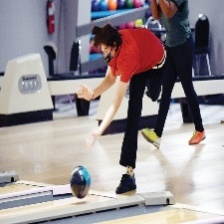

In [6]:
display(Image("Sample Images/bowling/001.jpg"))

In [5]:
from IPython.display import display, Image

In [13]:
data = tf.keras.utils.image_dataset_from_directory("Sample Images", batch_size=8)

Found 236 files belonging to 2 classes.


In [26]:
data = data.map(lambda x, y: (x / 255, y))

In [33]:
data_iterator = data.as_numpy_iterator()

In [34]:
batch = data_iterator.next()

In [29]:
batch[0].shape

(8, 256, 256, 3)

In [35]:
batch[1]

array([1, 1, 1, 0, 1, 1, 0, 1])

In [38]:
batch

(array([[[[0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 1.22549024e-03, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 1.22549024e-03, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 1.22549024e-03, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.0000

In [39]:
batch[0]

array([[[[0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
         [0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
         [0.00000000e+00, 1.22549024e-03, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
         [0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
         [0.00000000e+00, 1.22549024e-03, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
         [0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
         [0.00000000e+00, 1.22549024e-03, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [

In [40]:
batch[1]

array([1, 1, 1, 0, 1, 1, 0, 1])

In [41]:
batch

(array([[[[0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 1.22549024e-03, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 1.22549024e-03, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 1.22549024e-03, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.0000

In [44]:
batch

(array([[[[0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 1.22549024e-03, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 1.22549024e-03, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 1.22549024e-03, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.0000

In [47]:
len(batch[0])

8

In [57]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the data
data = tf.keras.utils.image_dataset_from_directory("Sample Images", batch_size=8)
print(data.class_names)
data = data.map(lambda x, y: (x / 255, y))

# Create a single batch from the dataset
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

# Define the model
model = models.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(2, activation="softmax"),  # 2 classes
    ]
)

# Compile the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Fit the model on the single batch
model.fit(batch[0], batch[1], epochs=10)

Found 236 files belonging to 2 classes.
['bowling', 'boxing']
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.7066 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 368ms/step - loss: 11.6027 - accuracy: 0.6250
Epoch 3/10
1/1 [==============================] - 0s 331ms/step - loss: 1.2219 - accuracy: 0.6250
Epoch 4/10
1/1 [==============================] - 0s 447ms/step - loss: 4.8604 - accuracy: 0.3750
Epoch 5/10
1/1 [==============================] - 0s 342ms/step - loss: 1.7446 - accuracy: 0.3750
Epoch 6/10
1/1 [==============================] - 0s 368ms/step - loss: 0.3718 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 376ms/step - loss: 0.1853 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 413ms/step - loss: 0.0436 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 412ms/step - loss: 0.1648 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 377m

In [68]:
from tensorflow.keras import layers, models

# Load the data
data = tf.keras.utils.image_dataset_from_directory(
    "Sample Images", batch_size=8, shuffle=True
)
data = data.map(lambda x, y: (x / 255, y))

# Get the size of the dataset
dataset_size = len(data)

# Calculate the sizes for train, validation, and test sets
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = int(0.15 * dataset_size)

# Split the dataset
train_data = data.take(train_size)
remaining_data = data.skip(train_size)
val_data = remaining_data.take(val_size)
test_data = remaining_data.skip(val_size)

# Define the model
model = models.Sequential(
    [
        layers.Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(2, activation="softmax"),  # 2 classes
    ]
)

# Compile the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Train the model
model.fit(train_data, validation_data=val_data, epochs=10)

Found 236 files belonging to 2 classes.
Epoch 1/10
21/21 [==============================] - 12s 512ms/step - loss: 1.5918 - accuracy: 0.5655 - val_loss: 0.6280 - val_accuracy: 0.9062
Epoch 2/10
21/21 [==============================] - 10s 498ms/step - loss: 0.4817 - accuracy: 0.8571 - val_loss: 0.3281 - val_accuracy: 0.9062
Epoch 3/10
21/21 [==============================] - 12s 561ms/step - loss: 0.1998 - accuracy: 0.9226 - val_loss: 0.1659 - val_accuracy: 0.9375
Epoch 4/10
21/21 [==============================] - 10s 485ms/step - loss: 0.1521 - accuracy: 0.9583 - val_loss: 0.1620 - val_accuracy: 0.9375
Epoch 5/10
21/21 [==============================] - 10s 465ms/step - loss: 0.0668 - accuracy: 0.9821 - val_loss: 0.1408 - val_accuracy: 0.9062
Epoch 6/10
21/21 [==============================] - 10s 450ms/step - loss: 0.0456 - accuracy: 0.9881 - val_loss: 0.0310 - val_accuracy: 1.0000
Epoch 7/10
21/21 [==============================] - 9s 439ms/step - loss: 0.0111 - accuracy: 1.0000 - 

In [53]:
model.evaluate(test_data)

5/5 [==============================] - 1s 81ms/step - loss: 0.1099 - accuracy: 0.9722


[0.1099453940987587, 0.9722222089767456]

In [66]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models

# Load the data
data = tf.keras.utils.image_dataset_from_directory(
    "Sample Images", batch_size=8, image_size=(224, 224), shuffle=True
)
data = data.map(lambda x, y: (x / 255.0, y))

# Calculate dataset sizes
dataset_size = len(data)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = int(0.15 * dataset_size)

# Split the dataset
train_data = data.take(train_size)
remaining_data = data.skip(train_size)
val_data = remaining_data.take(val_size)
test_data = remaining_data.skip(val_size)

# Load a pre-trained model from TensorFlow Hub
hub_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(
    hub_url, input_shape=(224, 224, 3), trainable=False
)

# Create the model
model = models.Sequential(
    [
        feature_extractor_layer,
        layers.Dense(2, activation="softmax"),  # 2 classes: boxing and bowling
    ]
)

# Compile the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Train the model
model.fit(train_data, epochs=10)
model.predict(test_data)

Found 236 files belonging to 2 classes.
Epoch 1/10
21/21 [==============================] - 11s 187ms/step - loss: 0.3944 - accuracy: 0.8214
Epoch 2/10
21/21 [==============================] - 4s 175ms/step - loss: 0.0799 - accuracy: 0.9881
Epoch 3/10
21/21 [==============================] - 4s 185ms/step - loss: 0.0356 - accuracy: 0.9940
Epoch 4/10
21/21 [==============================] - 3s 154ms/step - loss: 0.0240 - accuracy: 1.0000
Epoch 5/10
21/21 [==============================] - 3s 139ms/step - loss: 0.0243 - accuracy: 1.0000
Epoch 6/10
21/21 [==============================] - 3s 157ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 7/10
21/21 [==============================] - 3s 162ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 8/10
21/21 [==============================] - 4s 171ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 9/10
21/21 [==============================] - 4s 173ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 10/10
5/5 [==============================] - 1s 127ms

array([[9.9706453e-01, 2.9354459e-03],
       [9.8383123e-01, 1.6168742e-02],
       [9.9986887e-01, 1.3118458e-04],
       [6.5137312e-04, 9.9934858e-01],
       [1.4937113e-01, 8.5062891e-01],
       [9.9872249e-01, 1.2774847e-03],
       [9.8991871e-01, 1.0081270e-02],
       [9.7575074e-01, 2.4249183e-02],
       [9.3879563e-01, 6.1204258e-02],
       [9.9197876e-01, 8.0211777e-03],
       [2.5172791e-05, 9.9997479e-01],
       [9.9985743e-01, 1.4258228e-04],
       [9.9956363e-01, 4.3633624e-04],
       [9.9958318e-01, 4.1687684e-04],
       [9.9984550e-01, 1.5445804e-04],
       [9.9959260e-01, 4.0746303e-04],
       [9.9784422e-01, 2.1557773e-03],
       [8.9048920e-04, 9.9910939e-01],
       [7.1900017e-03, 9.9280995e-01],
       [9.1143191e-02, 9.0885681e-01],
       [6.7372131e-04, 9.9932629e-01],
       [4.5352887e-02, 9.5464706e-01],
       [9.9985313e-01, 1.4682529e-04],
       [3.6981859e-04, 9.9963027e-01],
       [2.6711561e-02, 9.7328836e-01],
       [9.7217596e-01, 2.

In [60]:
tf.keras.utils.image_dataset_from_directory

<function keras.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>